# Monte Carlo and Sampling Methods

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from numpy import random 
import numpy as np
import pandas as pd
from tqdm import tqdm, trange # prints a nice loading bar for the notebook
import timeit
from numba import jit
import copy
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## <span style="color:Orange">Introduction</span>

Monte Carlo (MC) integration and other sampling techniques are important tools for computing complex intgerals that arising in many areas of science. In this lecture, we will study Monte Carlo integration methods and re-visit Markov Chain MC with some specific physics examples. 

## <span style="color:Orange">Monte Carlo Integration</span>

Numerical integration uses the rectangle approximation to find the area under a curve.  The analytical notation we are used to seeing for a definite integral

$$ \Large
F = \int_a^b f(x) dx
$$

can be expressed as a [numerical approximation that adds up $n$ rectangles under the curve $f(x)$](https://mathworld.wolfram.com/NumericalIntegration.html).  The more rectangles used to calculate the area, the better the approximation becomes.

Monte Carlo Integration is a process of solving integrals having numerous values to integrate upon. The Monte Carlo process uses the theory of large numbers and random sampling to approximate values that are very close to the actual solution of the integral. 

Monte Carlo Integration improves above the integration approach by randomly picking which rectangles to add up next and approximating $F$ as $\langle F^N \rangle$:

$$ \Large
\langle F^N \rangle = ~\frac{1}{N} \sum_{i=1}^{N} \frac{f(X_i)}{p(X_i)} \\
~~~~~~~~~~~~~~~ = ~\frac{1}{N} \sum_{i=1}^{N} \frac{f(X_i)}{1 / (b-a)} \\
~~~~~~~~~~~~~~~ = ~\frac{b-a}{N} \sum_{i=1}^{N} f(X_i)
$$
$$ \Large
\Rightarrow
~~~\boxed{\langle F^N \rangle = \frac{b-a}{N} \sum_{i=1}^{N} f(X_i)} ~~~~~~~~~~~~~ \text{(Monte Carlo Estimator)}
$$

where $N$ is the number of times a new value $X_i$ is chosen from a probability distribution for range $a$ to $b$.  Therefore, 

$$ \Large
{\text{lim}}_{N→∞} \langle F^N \rangle = F
$$

The question becomes, what is the best way to choose $X_i$ to match the real system?  The goal is to get the best approximation as quickly as possible.

---

___<span style="color:Violet">EXAMPLE</span>___: Lets appoximate the definite integral using the Monte Carlo integration method:

$$ \Large
\int \limits_0^\pi \sin x ~dx
$$

In [2]:
# limits of integration 
a = 0
b = np.pi # gets the value of pi 
N = 1000

# array of zeros of length N 
ar = np.zeros(N) 

# iterating over each Value of ar and filling 
# it with a random value between the limits a 
# and b 
for i in range (len(ar)): 
	ar[i] = random.uniform(a,b) 

# variable to store sum of the functions of 
# different values of x 
integral = 0.0

# function to calculate the sin of a particular 
# value of x 
def f(x): 
	return np.sin(x) 

# iterates and sums up values of different functions 
# of x 
for i in ar: 
	integral += f(i) 

# we get the answer by the formula derived adobe 
ans = (b-a)/float(N)*integral 

# prints the solution 
print ("The value calculated by monte carlo integration is {}.".format(ans)) 


The value calculated by monte carlo integration is 2.0044013532431126.


The value obtained is very close to the actual answer of the integral which is 2.0. 

Now if we want to visualize the integration using a histogram, we can do so by using the matplotlib library. Again we import the modules, define the limits of integration and write the sin function for calculating the sin value for a particular value of x. Next, we take an array that has variables representing every beam of the histogram. Then we iterate through N values and repeat the same process of creating a zeros array, filling it with random x values, creating an integral variable adding up all the function values, and getting the answer N times, each answer representing a beam of the histogram.

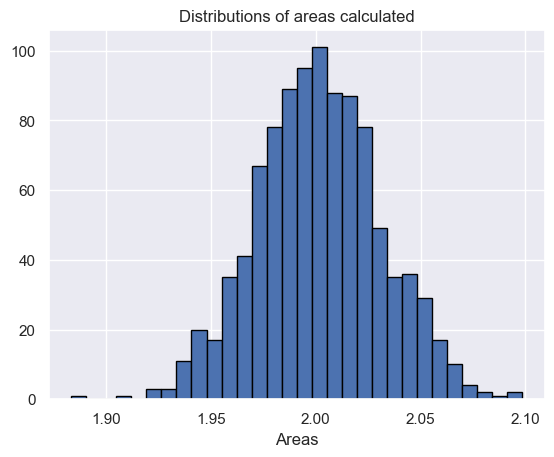

In [3]:
# limits of integration 
a = 0
b = np.pi # gets the value of pi 
N = 1000

# function to calculate the sin of a particular 
# value of x 
def f(x): 
	return np.sin(x) 

# list to store all the values for plotting 
plt_vals = [] 

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most. 
for i in range(N): 
	
	#array of zeros of length N 
	ar = np.zeros(N) 

	# iterating over each Value of ar and filling it 
	# with a random value between the limits a and b 
	for i in range (len(ar)): 
		ar[i] = random.uniform(a,b) 

	# variable to store sum of the functions of different 
	# values of x 
	integral = 0.0

	# iterates and sums up values of different functions 
	# of x 
	for i in ar: 
		integral += f(i) 

	# we get the answer by the formula derived adobe 
	ans = (b-a)/float(N)*integral 

	# appends the solution to a list for plotting the graph 
	plt_vals.append(ans) 

# details of the plot to be generated 
# sets the title of the plot 
plt.title("Distributions of areas calculated") 

# 3 parameters (array on which histogram needs 
plt.hist (plt_vals, bins=30, ec="black") 

# to be made, bins, separators colour between the 
# beams) 
# sets the label of the x-axis of the plot 
plt.xlabel("Areas") 
plt.show() # shows the plot


---

___<span style="color:Violet">EXAMPLE</span>___: Lets appoximate the definite integral

$$ \Large
\int \limits_0^1 x^2 ~dx
$$

In [4]:
# limits of integration 
a = 0
b = 1
N = 1000

# array of zeros of length N 
ar = np.zeros(N) 

# iterating over each Value of ar and filling 
# it with a random value between the limits a 
# and b 
for i in range(len(ar)): 
	ar[i] = random.uniform(a, b) 

# variable to store sum of the functions of 
# different values of x 
integral = 0.0

# function to calculate the sin of a particular 
# value of x 
def f(x): 
	return x**2

# iterates and sums up values of different 
# functions of x 
for i in ar: 
	integral += f(i) 

# we get the answer by the formula derived adobe 
ans = (b-a)/float(N)*integral 

# prints the solution 
print("The value calculated by monte carlo integration is {}.".format(ans)) 

The value calculated by monte carlo integration is 0.3383009616564424.


And then visualize:

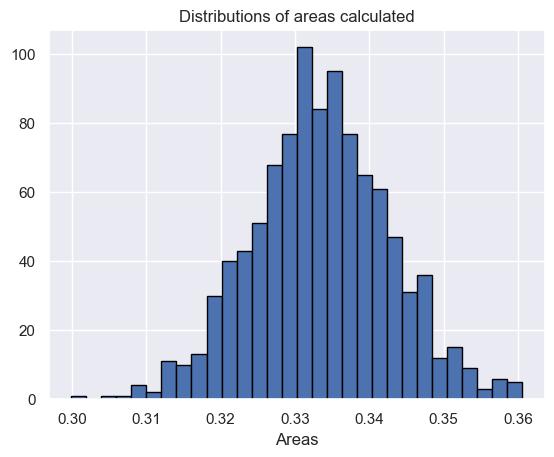

In [5]:
# limits of integration 
a = 0
b = 1
N = 1000

# function to calculate x^2 of a particular value 
# of x 
def f(x): 
	return x**2

# list to store all the values for plotting 
plt_vals = [] 

# we iterate through all the values to generate 
# multiple results and show whose intensity is 
# the most. 
for i in range(N): 
	
	# array of zeros of length N 
	ar = np.zeros(N) 

	# iterating over each Value of ar and filling 
	# it with a random value between the limits a 
	# and b 
	for i in range (len(ar)): 
		ar[i] = random.uniform(a,b) 

	# variable to store sum of the functions of 
	# different values of x 
	integral = 0.0

	# iterates and sums up values of different functions 
	# of x 
	for i in ar: 
		integral += f(i) 

	# we get the answer by the formula derived adobe 
	ans = (b-a)/float(N)*integral 

	# appends the solution to a list for plotting the 
	# graph 
	plt_vals.append(ans) 

# details of the plot to be generated 
# sets the title of the plot 
plt.title("Distributions of areas calculated") 

# 3 parameters (array on which histogram needs 
# to be made, bins, separators colour between 
# the beams) 
plt.hist (plt_vals, bins=30, ec="black") 

# sets the label of the x-axis of the plot 
plt.xlabel("Areas") 
plt.show() # shows the plot 


---

### <span style="color:LightBlue">Multidimensional Monte Carlo integration and variance scaling</span>

We can estimate the Monte Carlo variance of the approximation as

$$ \Large
v_N = \frac{1}{N^2} \sum_{i=1}^N \Biggl[ (f(x_i) - \bar{f_N})^2 \Biggr]
$$

Also, from the Central Limit Theorem,

$$ \Large
\frac{\bar{f_N} - E[f(X)]}{\sqrt{v_N}} \sim \mathcal{N}(0, 1)
$$

The convergence of Monte Carlo integration is $O(\sqrt{N})$ and independent of the dimensionality. Hence Monte Carlo integration generally beats numerical integration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $O(N^d)$. Even for low dimensional problems, Monte Carlo integration may have an advantage when the volume to be integrated is concentrated in a very small region and we can use information from the distribution to draw samples more often in the region of importance.

___<span style="color:Violet">EXAMPLE</span>___: 3-D Integration

$$ \Large
\int\limits_{x_0}^{x_1} ~ \int\limits_{y_0}^{y_1} ~ \int\limits_{z_0}^{z_1} f(x, y, z) dx~dy~dz
$$

Uniform 3-D random variable:

$$\Large
X_i \sim p(x,y,z) = \frac{1}{x_1 - x_0} ~ \frac{1}{y_1 - y_0} ~ \frac{1}{z_1 - z_0}
$$

Basic 3-D estimator:

$$ \Large
F_N = \frac{(x_1 - x_0)(y_1 - y_0)(z_1 - z_0)}{N} ~ \sum\limits_{i=1}^{N} f(X_i)
$$

This generalizes to abitrary N-dimensional PDFs

### <span style="color:LightBlue">Variance and Bias in Monte Carlo integration</span>

We are often interested in knowing how many iterations it takes for Monte Carlo integration to “converge” and the accuracy of the calculation. To do this, we would like some estimate of the variance and to ensure it is unbiased. It is useful to inspect such plots. One simple way to get confidence intervals for the plot of Monte Carlo estimate against number of iterations is simply to do many such simulations.

___<span style="color:Violet">EXAMPLE</span>___: Using Monte Carlo methods, estimate the integral of the function

$$ \Large
f(x) = x \cos 7x + \sin 13x, \ \ \ 0 \le x \le 1
$$

In [6]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

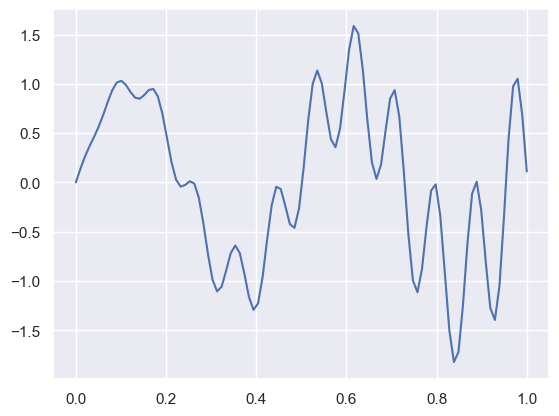

In [7]:

x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
pass

#### <span style="color:Tan">Single Monte Carlo estimate</span>

In [8]:
n = 100
x = f(np.random.random(n))
y = 1.0/n * np.sum(x)
print(y)

0.06501066402433


#### <span style="color:Tan">Using multiple independent sequences to monitor convergence</span>

We vary the sample size from 1 to 100 and calculate the value of $y=\sum x / n$ for 1000 replicates. We then plot the 2.5th and 97.5th percentile of the 1000 values of $y$ to see how the variation in $y$ changes with sample size. The blue lines indicate the 2.5th and 97.5th percentiles, and the red line a sample path.

In [9]:
n = 100
reps = 1000

x = f(np.random.random((n, reps)))
y = 1/np.arange(1, n+1)[:, None] * np.cumsum(x, axis=0)
upper, lower = np.percentile(y, [2.5, 97.5], axis=1)

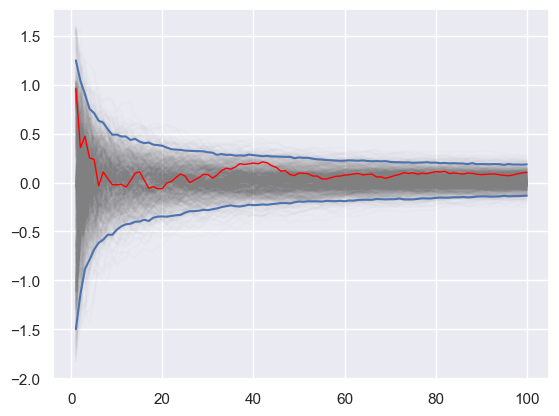

In [10]:
plt.plot(np.arange(1, n+1), y, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), y[:, 0], c='red', linewidth=1);
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b')
pass

#### <span style="color:Tan">Proof that Monte Carlo Estimator is Unbiased</span>

It is straightforward to prove that the expectation value of the Monte Carlo estimator is the desired integral (i.e. it is unbiased). 

First recall some properties of the expectation value $E$:

$$ \Large
E ~ \Biggl[ \sum\limits_i Y_i \Biggr] = \sum\limits_i E\bigl[ Y_i \bigr]   ~~~~~~~~~~~~~~~~~~~~~ E~\Bigl[ aY \Bigr] = a E~\Bigl[ Y \Bigr]
$$

Then

$$ \Large E~\Bigl[ F_N \Bigr] = E ~ \Biggl[ \frac{1}{N} ~ \sum\limits_{i=1}^N \frac{f(X_i)}{p(X_I)} \Biggr] \\
~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~E~ \Biggl[ \frac{f(X_i)}{p(X_I)} \Biggr] \\
~~~~~~~~~~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~\int\limits_a^b \frac{f(x)}{p(x)} ~p(x) ~dx \\
~~~~~~~~~~~~~~ = \frac{1}{N} ~ \sum\limits_{i=1}^N ~\int\limits_a^b f(x)  ~dx \\
~~ = \int\limits_a^b f(x)  ~dx \\
$$

---

### <span style="color:LightBlue">Change of Variables</span>

The Cauchy distribution is given by

$$ \Large
f(x) = \frac{1}{\pi (1 + x^2)}, \ \ -\infty \lt x \lt \infty
$$

Suppose we want to integrate the tail probability $P(X>3)$ using Monte Carlo. One way to do this is to draw many samples form a Cauchy distribution, and count how many of them are greater than 3, but this is extremely inefficient.

Only 10% of samples will be used

In [11]:
h_true = 1 - stats.cauchy().cdf(3)
print(h_true)

0.10241638234956674


In [12]:
n = 100

x = stats.cauchy().rvs(n)
h_mc = 1.0/n * np.sum(x > 3)
h_mc, np.abs(h_mc - h_true)/h_true

(0.09, 0.12123433834234887)

#### <span style="color:Tan">A change of variables lets us use 100% of draws</span>

We are trying to estimate the quantity

$$ \Large
\int_3^\infty \frac{1}{\pi (1 + x^2)} dx
$$

Using the substitution $y=3/x$ (and a little algebra), we get

$$ \Large
\int_0^1 \frac{3}{\pi(9 + y^2)} dy
$$

Hence, a much more efficient MC estimator is

$$ \Large
\frac{1}{n} \sum_{i=1}^n \frac{3}{\pi(9 + y_i^2)}
$$

where $y_i \sim \square(0,1)$

In [13]:
y = stats.uniform().rvs(n)
h_cv = 1.0/n * np.sum(3.0/(np.pi * (9 + y**2)))
h_cv, np.abs(h_cv - h_true)/h_true

(0.10214639962709447, 0.0026361282861052616)

### <span style="color:LightBlue">Monte Carlo Swindles</span>

Apart from change of variables, there are several general techniques for variance reduction, sometimes known as Monte Carlo "swindles" since these methods improve the accuracy and convergence rate of Monte Carlo integration without increasing the number of Monte Carlo samples. Some Monte Carlo swindles are:

- importance sampling

- stratified sampling

- control variates

- antithetic variates

- conditioning swindles including Rao-Blackwellization and independent variance decomposition

Most of these techniques are not particularly computational in nature, so we will not cover them in the course. I expect you will learn them elsewhere. We will illustrate importance sampling and antithetic variables here as examples.

#### <span style="color:Tan">Antithetic variables</span>

The idea behind antithetic variables is to choose two sets of random numbers that are negatively correlated, then take their average, so that the total variance of the estimator is smaller than it would be with two sets of independent and identically distributed (IID) random variables.

In [14]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [15]:
from sympy import sin, cos, symbols, integrate

x = symbols('x')
sol = integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(16)
print(sol)

0.02025493910239406


Using just vanilla Monte Carlo:

In [16]:
n = 10000
u = np.random.random(n)
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.014995081649577486, 0.2596827088063116)

Using antithetic variables for the first half of $u$ supplemented with $1-u$:

In [17]:
u = np.r_[u[:n//2], 1-u[:n//2]]
x = f(u)
y = 1.0/n * np.sum(x)
y, abs(y-sol)/sol

(0.016223138830533983, 0.1990526977878462)

This works because the random draws are now negatively correlated, and hence the sum of the variances will be less than in the IID case, while the expectation is unchanged.

#### <span style="color:Tan">Importance Sampling</span>

Ordinary Monte Carlo sampling evaluates

$$ \Large
E[g(X)] = \int_X g(x)\, p(x) \, dx
$$

Using another distribution $h(x)$ which is the so-called “importance function”, we can rewrite the above expression as an expectation with respect to $h$

$$ \Large
E_p[f(x)] \ = \ \int_X f(x) \frac{p(x)}{h(x)} h(x) dx \ = \ E_h\left[ \frac{f(X) p(X)}{h(X)} \right] 
$$

giving us the new estimator

$$ \Large
\bar{f_n} = \frac{1}{N} \sum_{i=1}^n \frac{p(x_i)}{h(x_i)} f(x_i)
$$

where $x_i \sim f$ is a draw from the density $h$.

This is helpful if the distribution $h$ has a similar shape as the function $f(x)$ that we are integrating over, since we will draw more samples from places where the integrand makes a larger or more “important” contribution. This is very dependent on a good choice for the importance function $h$.

Two simple choices for $h$ are scaling

$$ \Large
h(x) = \frac{1}{a} ~p(x/a)
$$

and translation

$$ \Large
h(x) = p ~(x - a)
$$

In these cases, the parameter a is typically chosen using some adaptive algorithm, giving rise to adaptive importance sampling. Alternatively, a different distribution can be chosen as shown in the example below.

---

___<span style="color:Violet">EXAMPLE</span>___: Suppose we want to estimate the tail probability of $\square (0,1)$ for $P(X>5)$. 

Regular MC integration using samples from $\square (0,1)$ is hopeless since nearly all samples will be rejected. However, we can use the exponential density truncated at 5 as the importance function and use importance sampling.

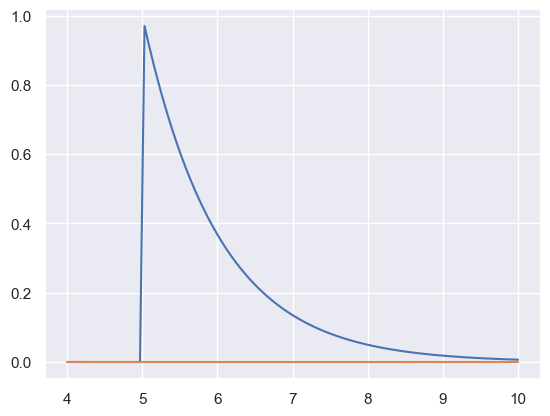

In [18]:
x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))
pass

#### <span style="color:Tan">Expected answer</span>

We expect about 3 draws out of 10,000,000 from $\square (0,1)$ to have a value greater than 5. Hence simply sampling from $\square (0,1)$ is hopelessly inefficient for Monte Carlo integration.

In [19]:
%precision 10

'%.10f'

In [20]:
h_true = 1 - stats.norm().cdf(5)
h_true

0.0000002867

#### <span style="color:Tan">Using direct Monte Carlo integration</span>

In [21]:
n = 10000
y = stats.norm().rvs(n)
h_mc = 1.0/n * np.sum(y > 5)
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0000000000, 1.0000000000)

#### <span style="color:Tan">Using importance sampling</span>

In [45]:
n = 10000
y = stats.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(0.0000002854, 0.9999972129)

---

### <span style="color:LightBlue">Vegas Method</span>

The VEGAS algorithm, due to G. Peter Lepage, is a method for reducing error in Monte Carlo simulations by using a known or approximate probability distribution function to concentrate the search in those areas of the integrand that make the greatest contribution to the final integral. 

The VEGAS algorithm is based on importance sampling. It samples points from the probability distribution described by the function $|f|$ so that the points are concentrated in the regions that make the largest contribution to the integral

___<span style="color:Violet">EXAMPLE</span>___: 4-D Monte Carlo integration with Vegas

Here we illustrate the use of [vegas](https://vegas.readthedocs.io/en/latest/vegas.html#module-vegas) by estimating the following integral:

$$ \Large
C \int\limits_{-1}^{1} ~dx_0 ~ \int\limits_{0}^{1} ~dx_1 ~ \int\limits_{0}^{1} ~dx_2 ~ \int\limits_{0}^{1} ~dx_3 ~ e^{-100 \sum_d (x_d - 0.5)^2}
$$

First we define the integrand $f(x)$ where $x[d]$ specifies a point in the 4-dimensional space. 

We then create an integrator `integ` which is an integration operator that can be applied to any 4-dimensional function. It is where we specify the integration volume. 

Finally we apply `integ` to our integrand $f(x)$, telling the integrator to estimate the integral using `nitn=10` iterations of the vegas algorithm, each of which uses no more than `neval=1000` evaluations of the integrand. Each iteration produces an independent estimate of the integral. 

The final estimate is the weighted average of the results from all 10 iterations, and is returned by `integ(f ...)`. The call `result.summary()` returns a summary of results from each iteration.

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   1.010(29)       1.010(29)           0.00     1.00
  2   0.990(21)       0.997(17)           0.29     0.59
  3   1.008(18)       1.002(12)           0.25     0.78
  4   0.981(14)       0.9929(91)          0.62     0.60
  5   1.006(13)       0.9973(74)          0.63     0.64
  6   0.987(11)       0.9941(61)          0.62     0.68
  7   1.009(11)       0.9976(53)          0.75     0.61
  8   0.994(11)       0.9969(48)          0.65     0.71
  9   0.9977(94)      0.9970(43)          0.57     0.80
 10   1.000(15)       0.9973(41)          0.51     0.87

result = 0.9973(41)    Q = 0.87


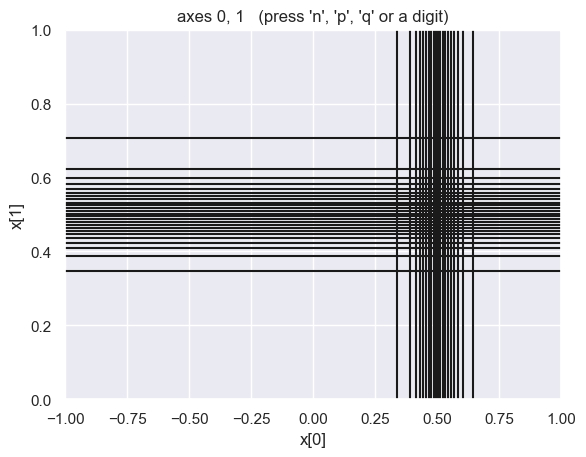

In [48]:
#%pip install vegas

import vegas

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return np.exp(-dx2 * 100.) * 1013.2118364296088

# seed the random number generator so results reproducible
np.random.seed((1, 2, 3))

# assign integration volume to integrator
integ = vegas.Integrator([[-1., 1.], [0., 1.], [0., 1.], [0., 1.]])

# adapt to the integrand; discard results
integ(f, nitn=5, neval=1000)

# do the final integral
result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))
integ.map.show_grid(20)


---
## Acknowledgements
* Initial version: Mark Neubauer
* From APS DSECOP materials and https://people.duke.edu/~ccc14/sta-663-2016/15C_MonteCarloIntegration.html

© Copyright 2024